In [41]:
### Extra code to reuse

## Exporting data to CSV
# combined_data.to_csv('file_name.csv')

## Finding what the Data Type a column is.
# data_type = IMDb_Basics['isAdult'].dtype
# print(data_type)

## Filtering dataframes for a specific values
# filtered_df = IMDB_Basics[IMDB_Basics['primaryTitle'].str.contains('Bond', case=False, na=False)]
# print(filtered_df)

# Optionally save the combined dataframe to a new CSV file
# output_file = path_to_files + 'combined_data.csv'
# combined_df.to_csv(output_file, index=False)
# print(f"Combined CSV saved to {output_file}")

In [ ]:
# Meeting notes

# Meeting 1 Feedback- In-Progress
# Project Proposal Meeting notes
# Outcome variable is Stock returns
# We cannot have 2 different observations we could use weighted average or just an average of the 2 movies. Because in a month there could be 2 movies launched by Disney and we need to be able to see what is the causal but with just 1 movie.
# We should do quarterly and then do monthly. So this way we will be able to see a change in the response from investors and the market.
# I will determine the number of years of data according to the number of observations.
# (I can include Text analysis based on individual people’s reviews for each movies. I can use this for my Capstone project. I can do analysis on if someone left a good review score and bad text comments.)

# Meeting 2 Feedback- 

# Importing all Datasets

In [42]:
import os
import glob
import math
import numpy as np
import pandas as pd
from datetime import datetime

os.chdir('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/ECON 5813 - Economic Analytics I/Project Proposal/Data')

# 1: Stocks
Amazon_Stock = pd.read_csv('Amazon Stock.csv')
Apple_Stock = pd.read_csv('Apple Stock.csv')
ATT_Stock = pd.read_csv('AT&T Stock.csv')
Comcast_Stock = pd.read_csv('Comcast Stock.csv')
Lions_Gate_Historical_B = pd.read_csv('Lions Gate Historical.csv')
Netflix_Stock_Data = pd.read_csv('Netflix Stock Data.csv')
Paramount_Global_Historical_Prices = pd.read_csv('Paramount Global Historical Prices.csv')
Sony_Stock = pd.read_csv('Sony Stock.csv')
The_Walt_Disney_Company_Historical_Prices = pd.read_csv('The Walt Disney Company Historical Prices.csv')
Warner_Bros_Discovery = pd.read_csv('Warner Bros Discovery.csv')
Vanguard_500_Historical = pd.read_csv('Vanguard 500 Historical.csv')

#############

# 2: Economic Indicators 
GDP = pd.read_csv('GDP.csv') # Billions of Dollars & Seasonally Adjusted Annual Rate
Unemployment_Rate = pd.read_csv('Unemployment Rate US.csv') # This is Percent & Seasonally Adjusted

#############

# 3. IMDB Data -- More about the dataset below in markdown
IMDb_Basics = pd.read_csv('IMDb Basics.tsv', sep='\t')
IMDb_Name_Basics = pd.read_csv('IMDb Name Basics.tsv', sep='\t')
IMDb_Ratings = pd.read_csv('IMDb Ratings.tsv', sep='\t')
IMDb_Title_Akas = pd.read_csv('IMDb Title Akas.tsv', sep='\t')
IMDb_Title_Crew = pd.read_csv('IMDb Title Crew.tsv', sep='\t')
Title_Episode = pd.read_csv('Title Episode.tsv', sep='\t')
Title_Principals = pd.read_csv('Title Principals.tsv', sep='\t')

#############

# 4: Gross Movie revenue data
# Function to try multiple date formats
def parse_dates(date):
    for fmt in ('%d-%b', '%Y-%m-%d', '%m/%d/%Y', '%d/%m/%Y'):  # Add or modify formats as needed
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    # Return the original date if no format matched
    return pd.NaT

# Path to the directory where all your CSV files are stored
path_to_files = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/ECON 5813 - Economic Analytics I/Project Proposal/Data/Gross Data/'

# Use glob to match the pattern for all CSV files. The * wildcard will match any characters
file_pattern = path_to_files + '/* *.csv'
file_list = glob.glob(file_pattern)

# Create an empty list to hold your dataframes
dataframes_list = []

# Loop over the list of file paths & names
for file_name in file_list:
    # Read the current file into a dataframe
    df = pd.read_csv(file_name)
    
    # Extract month and year from the filename to create a new 'Date' column if needed
    # This can help if the 'Release Date' column isn't consistent
    month_year = file_name.split('/')[-1].replace('.csv', '')
    try:
        # Trying to convert 'month year' to a datetime object, assuming format 'Month YYYY'
        df['Date'] = datetime.strptime(month_year, '%B %Y')
    except ValueError:
        print(f"Skipping file {file_name}: Date format issue")
        continue
    
    # Append the dataframe to the list
    dataframes_list.append(df)

# Combine all dataframes into one
Movie_Revenues = pd.concat(dataframes_list, ignore_index=True)

# Apply the custom date parser to the 'Release Date' column
Movie_Revenues['Release Date'] = Movie_Revenues['Release Date'].apply(parse_dates)

# Now, sort by 'Release Date' if possible, otherwise, by the new 'Date' column
if Movie_Revenues['Release Date'].isnull().all():
    Movie_Revenues = Movie_Revenues.sort_values('Date')
else:
    Movie_Revenues = Movie_Revenues.sort_values('Release Date')

/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_26303/2693294857.py:32: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  IMDb_Basics = pd.read_csv('IMDb Basics.tsv', sep='\t')
/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_26303/2693294857.py:35: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  IMDb_Title_Akas = pd.read_csv('IMDb Title Akas.tsv', sep='\t')


---------------

# Modeling Stocks Data

In [43]:
# Adding company to each individual stick dataframe to the respective company name.
Amazon_Stock['Company'] = 'Amazon'
Apple_Stock['Company'] = 'Apple'
ATT_Stock['Company'] = 'AT&T'
Comcast_Stock['Company'] = 'Comcast'
Lions_Gate_Historical_B['Company'] = 'Lions Gate'
Netflix_Stock_Data['Company'] = 'Netflix'
Paramount_Global_Historical_Prices['Company'] = 'Paramount Global'
Sony_Stock['Company'] = 'Sony'
The_Walt_Disney_Company_Historical_Prices['Company'] = 'Walt Disney'
Warner_Bros_Discovery['Company'] = 'Warner Bros Discovery'
Vanguard_500_Historical['Company'] = 'Vanguard_500_Historical'

# Convert 'Date' columns to datetime for all dataframes before merging
# Note: If your date formats are inconsistent, you may need to handle them individually.
company_stocks = [Amazon_Stock, Apple_Stock, ATT_Stock, Comcast_Stock, Lions_Gate_Historical_B, Netflix_Stock_Data, Paramount_Global_Historical_Prices, Sony_Stock, The_Walt_Disney_Company_Historical_Prices, Warner_Bros_Discovery, Vanguard_500_Historical]

for stock_df in company_stocks:
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Define the list of company names
company_names = ['Amazon', 'Apple', 'AT&T', 'Comcast', 'Lions Gate', 'Netflix', 'Paramount Global', 'Sony', 'Walt Disney', 'Warner Bros Discovery', 'Vanguard 500']

# Initialize the combined DataFrame
all_stocks = pd.DataFrame()

# Loop through each company DataFrame
for stock_df, company_name in zip(company_stocks, company_names):
    # Rename columns to include the company name (excluding 'Date')
    cols_to_rename = {col: f"{col}_{company_name}" for col in stock_df.columns if col != 'Date'}
    df_renamed = stock_df.rename(columns=cols_to_rename)
    
    # Merge with the combined DataFrame
    if all_stocks.empty:
        all_stocks = df_renamed
    else:
        all_stocks = all_stocks.merge(df_renamed, on='Date', how='outer')

# all_stocks now contains all the data with renamed columns and one 'Date' column
all_stocks.sort_values('Date', inplace=True)

# Check the result
print(all_stocks.head())


            Date  Open_Amazon  High_Amazon  Low_Amazon  Close_Amazon  \
12775 1962-01-02          NaN          NaN         NaN           NaN   
12776 1962-01-03          NaN          NaN         NaN           NaN   
12777 1962-01-04          NaN          NaN         NaN           NaN   
12778 1962-01-05          NaN          NaN         NaN           NaN   
12779 1962-01-08          NaN          NaN         NaN           NaN   

       Adj Close_Amazon  Volume_Amazon Company_Amazon  Open_Apple  High_Apple  \
12775               NaN            NaN            NaN         NaN         NaN   
12776               NaN            NaN            NaN         NaN         NaN   
12777               NaN            NaN            NaN         NaN         NaN   
12778               NaN            NaN            NaN         NaN         NaN   
12779               NaN            NaN            NaN         NaN         NaN   

       ...  Adj Close_Warner Bros Discovery  Volume_Warner Bros Discovery  \
127

/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_26303/3921085680.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stock_df['Date'] = pd.to_datetime(stock_df['Date'])


In [44]:
def parse_dates(date):
    for fmt in ("%Y-%m-%d", "%m/%d/%y"):  # Add or adjust formats as needed
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # return Not a Time for unparseable formats

all_stocks['Date'] = all_stocks['Date'].apply(parse_dates)

## all_stocks table and it's statistics

In [45]:
# Code to check date column

# 1. Check for NaT values:
# If you used errors='coerce' during the conversion, you can check for NaT values, which would indicate conversion failures.
# nat_counts = all_stocks['Date'].isna().sum()
# print(f"Number of NaT values in 'Date': {nat_counts}")

# 2. Check the range of dates:
# Look at the minimum and maximum values to ensure they are within expected bounds.
# print("Earliest date:", all_stocks['Date'].min())
# print("Latest date:", all_stocks['Date'].max())

# 3. Sample random dates:
# Random sampling of dates can give you a quick spot check to see if dates look correctly formatted.
# print(all_stocks['Date'].sample(10))

# 4. Validate with known dates:
# If you know certain dates should exist in the dataset, check those specifically.
# known_dates = ["1997-05-15", "2005-07-08"]  # Example dates you expect to find
# for date in known_dates:
#     if pd.to_datetime(date) not in all_stocks['Date'].values:
#         print(f"Date {date} is not found or incorrectly formatted.")
#     else:
#         print(f"Date {date} is correctly formatted.")

# 5. Check for duplicates:
# Ensuring that there are no duplicate dates which could suggest an issue with the conversion.
# duplicate_dates = all_stocks['Date'].duplicated().sum()
# print(f"Number of duplicate dates: {duplicate_dates}")


In [ ]:
# Code to check basic information about a table

# all_stocks.info()

all_stocks.dtypes[6]

all_stocks.isnull().sum()

all_stocks.isnull().mean()

all_stocks.nunique()

all_stocks.value_counts()

all_stocks.memory_usage(deep=True)

#Descriptive Statistics for All Stocks.
print(all_stocks.describe())

In [46]:
all_stocks.head()

,Date,Open_Amazon,High_Amazon,Low_Amazon,Close_Amazon,Adj Close_Amazon,Volume_Amazon,Company_Amazon,Open_Apple,High_Apple,...,Adj Close_Warner Bros Discovery,Volume_Warner Bros Discovery,Company_Warner Bros Discovery,Open_Vanguard 500,High_Vanguard 500,Low_Vanguard 500,Close_Vanguard 500,Adj Close_Vanguard 500,Volume_Vanguard 500,Company_Vanguard 500
12775,1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12776,1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12777,1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12778,1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12779,1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


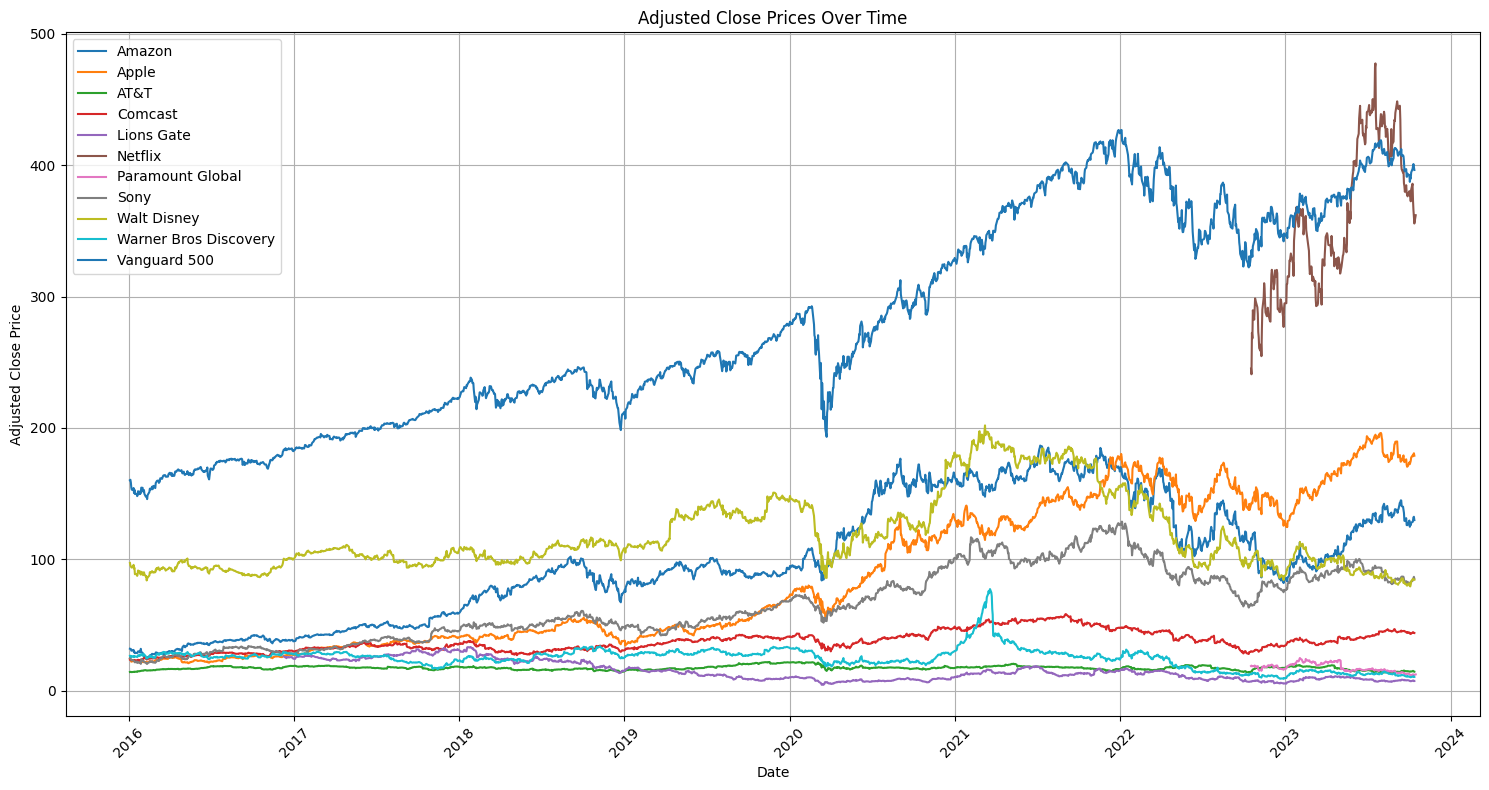

In [55]:
# Charting the stocks with the Adjusted_Close prices

import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(15, 8))

#filtering for years after 2000
filtered_stocks = all_stocks[all_stocks['Date'].dt.year > 2015]

# Loop through each company to plot their data
for company_name in company_names:
    # Check if 'Adj Close_{company_name}' column exists
    if f'Adj Close_{company_name}' in filtered_stocks.columns:
        plt.plot(filtered_stocks['Date'], filtered_stocks[f'Adj Close_{company_name}'], label=company_name)

# Set the title and labels
plt.title('Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Enable the legend
plt.legend()

# Show a grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

---------------------

# Modeling Economic Indicators

In [56]:
#Renaming a column in the Unemployment table
Unemployment_Rate.rename(columns={'LRUNTTTTUSQ156S': 'Unemployment_rate'}, inplace=True)
# Unemployment_Rate.head()

# Convert the dictionaries to DataFrames
GDP = pd.DataFrame(GDP)
Unemployment = pd.DataFrame(Unemployment_Rate)

# Merge the DataFrames on the 'DATE' column
Economic_Indicators = GDP.merge(Unemployment, on='DATE', how='outer')

Economic_Indicators.tail()
# Economic_Indicators.to_csv('file_name.csv')

,DATE,GDP,Unemployment_rate
301,2022-04-01,25544.273,3.600000
302,2022-07-01,25994.639,3.566667
303,2022-10-01,26408.405,3.600000
304,2023-01-01,26813.601,3.500000
305,2023-04-01,27063.012,3.566667


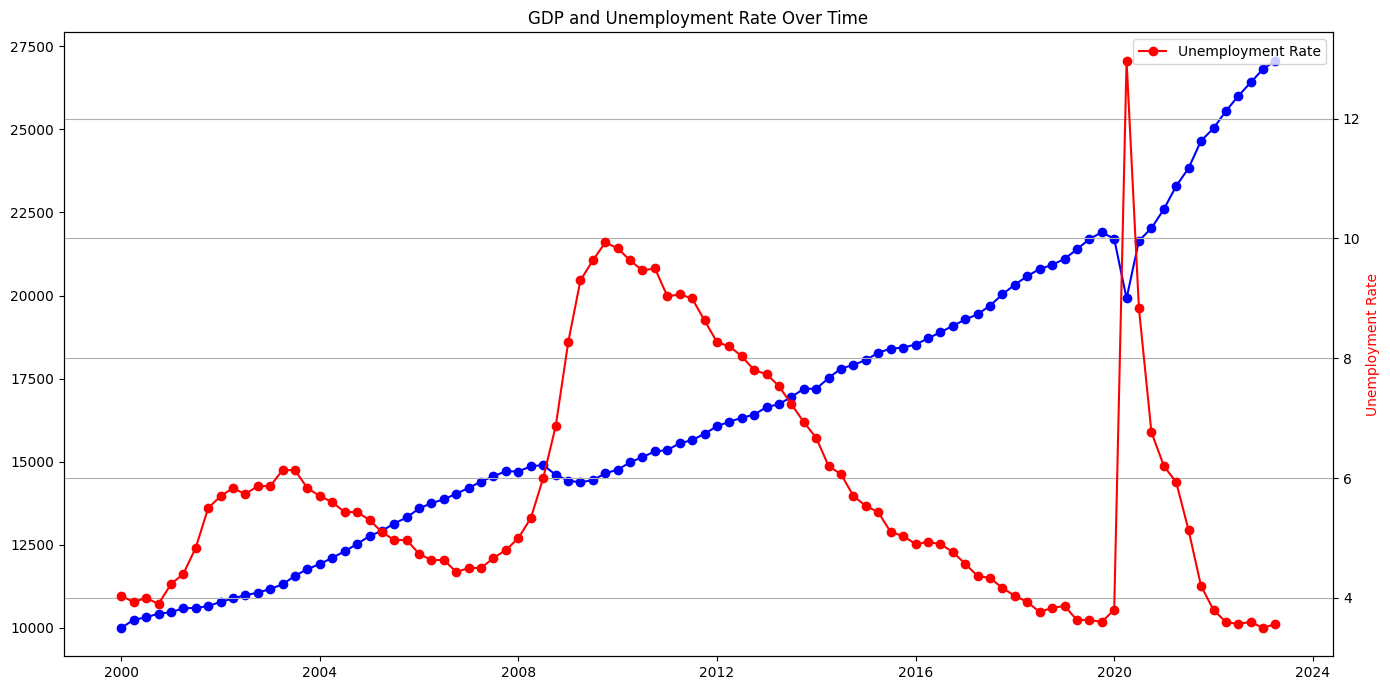

In [81]:
# Charting the Economic Indicators

Economic_Indicators = pd.DataFrame(Economic_Indicators)

# Convert 'DATE' to datetime if it's not already
Economic_Indicators['DATE'] = pd.to_datetime(Economic_Indicators['DATE'])

# Filter the DataFrame for years greater than or equal to 2000
Economic_Indicators = Economic_Indicators[Economic_Indicators['DATE'].dt.year >= 2000]

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size

# Plot GDP
plt.plot(Economic_Indicators['DATE'], Economic_Indicators['GDP'], label='GDP', marker='o', color='blue')

# Plot Unemployment Rate on a secondary y-axis
ax2 = plt.gca().twinx()
ax2.plot(Economic_Indicators['DATE'], Economic_Indicators['Unemployment_rate'], label='Unemployment Rate', marker='o', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('GDP', color='blue')
ax2.set_ylabel('Unemployment Rate', color='red')
plt.title('GDP and Unemployment Rate Over Time')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show a grid
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()

# Cleaning all IMDB

<a name="_page0_x69.69_y423.22"></a>**IMDb Dataset Legend**

<Details>

Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name. The available datasets are as follows:

<a name="_page0_x60.71_y555.04"></a>**title.akas.tsv.gz**

- titleId (string) - a tconst, an alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- title (string) – the localized title
- region (string) - the region for this version of the title
- language (string) - the language of the title
- types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
- attributes (array) - Additional terms to describe this alternative title, not enumerated
- isOriginalTitle (boolean) – 0: not original title; 1: original title <a name="_page1_x60.71_y183.54"></a>**title.basics.tsv.gz**
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year ![](Aspose.Words.6ef9d709-0a24-4a63-90ff-a7a4701c44f5.002.png) endYear (YYYY) – TV Series end year. ‘\N’ for all other title types ![](Aspose.Words.6ef9d709-0a24-4a63-90ff-a7a4701c44f5.003.png) runtimeMinutes – primary runtime of the title, in minutes ![](Aspose.Words.6ef9d709-0a24-4a63-90ff-a7a4701c44f5.004.png) genres (string array) – includes up to three genres associated with the title

<a name="_page1_x60.71_y549.05"></a>**title.crew.tsv.gz**

- tconst (string) - alphanumeric unique identifier of the title
- directors (array of nconsts) - director(s) of the given title
- writers (array of nconsts) – writer(s) of the given title

<a name="_page1_x60.71_y680.87"></a>**title.episode.tsv.gz**

- tconst (string) - alphanumeric identifier of episode
- parentTconst (string) - alphanumeric identifier of the parent TV Series
- seasonNumber (integer) – season number the episode belongs to
- episodeNumber (integer) – episode number of the tconst in the TV series

<a name="_page2_x60.71_y99.65"></a>**title.principals.tsv.gz**

- tconst (string) - alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else '\N'
- characters (string) - the name of the character played if applicable, else '\N'

<a name="_page2_x60.71_y321.35"></a>**title.ratings.tsv.gz**

- tconst (string) - alphanumeric unique identifier of the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received

<a name="_page2_x60.71_y453.18"></a>**name.basics.tsv.gz**

- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else '\N'
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for



### 1. Cleaning IMDB_Basics
-----------

In [82]:
# Converting the data to different data types

IMDb_Basics['tconst'] = IMDb_Basics['tconst'].astype(str)
IMDb_Basics['primaryTitle'] = IMDb_Basics['primaryTitle'].astype(str)
IMDb_Basics['originalTitle'] = IMDb_Basics['originalTitle'].astype(str)
IMDb_Basics['isAdult'] = IMDb_Basics['isAdult'].astype(bool)

# Handle 'startYear'
IMDb_Basics['startYear'] = IMDb_Basics['startYear'].replace('\\N', np.nan)
IMDb_Basics['startYear'] = IMDb_Basics['startYear'].astype('float').astype('Int64')

# Handle 'endYear'
IMDb_Basics['endYear'] = IMDb_Basics['endYear'].replace('\\N', np.nan)
IMDb_Basics['endYear'] = IMDb_Basics['endYear'].astype('float').astype('Int64')

IMDb_Basics['runtimeMinutes'] = IMDb_Basics['runtimeMinutes'].astype(str)
IMDb_Basics['genres'] = IMDb_Basics['genres'].astype(str)

In [60]:
print(IMDb_Basics.dtypes)

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult             bool
startYear          Int64
endYear            Int64
runtimeMinutes    object
genres            object
dtype: object


In [61]:
IMDb_Basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,True,1894,<NA>,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,True,1892,<NA>,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,True,1892,<NA>,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,True,1892,<NA>,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,True,1893,<NA>,1,"Comedy,Short"


### 2. Cleaning IMDB_name_Basic
-----------

In [62]:
# Inspecting how the df looks.
IMDb_Name_Basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0031983,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0049189,tt0054452,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0069467"


In [63]:
# Inspecting the data types
print(IMDb_Name_Basics.dtypes)

nconst               object
primaryName          object
birthYear            object
deathYear            object
primaryProfession    object
knownForTitles       object
dtype: object


In [64]:
# Convert string columns
IMDb_Name_Basics['nconst'] = IMDb_Name_Basics['nconst'].astype(str)
IMDb_Name_Basics['primaryName'] = IMDb_Name_Basics['primaryName'].astype(str)
IMDb_Name_Basics['primaryProfession'] = IMDb_Name_Basics['primaryProfession'].astype(str)
IMDb_Name_Basics['knownForTitles'] = IMDb_Name_Basics['knownForTitles'].astype(str)

# Convert birthYear and deathYear to integer (with NA support)
# First, replace '\N' with NaN
IMDb_Name_Basics['birthYear'].replace('\\N', pd.NA, inplace=True)
IMDb_Name_Basics['deathYear'].replace('\\N', pd.NA, inplace=True)

# Convert to Int64 (capital "I" to support NaN)
IMDb_Name_Basics['birthYear'] = IMDb_Name_Basics['birthYear'].astype('Int64')
IMDb_Name_Basics['deathYear'] = IMDb_Name_Basics['deathYear'].astype('Int64')


In [65]:
# Finally looking at the changed data types
print(IMDb_Name_Basics.dtypes)

nconst               object
primaryName          object
birthYear             Int64
deathYear             Int64
primaryProfession    object
knownForTitles       object
dtype: object


### 3. Cleaning IMDb_Ratings DF
------------

In [66]:
IMDb_Ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2002
1,tt0000002,5.8,269
2,tt0000003,6.5,1892
3,tt0000004,5.5,178
4,tt0000005,6.2,2679


In [67]:
# Inspecting the data types
IMDb_Ratings.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

### 4. Cleaning IMDb_Title_Akas
-----------

In [68]:
IMDb_Title_Akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [69]:
IMDb_Title_Akas.dtypes

titleId            object
ordering            int64
title              object
region             object
language           object
types              object
attributes         object
isOriginalTitle    object
dtype: object

### 5. Cleaning IMDb_Title_Crew
-----------

In [70]:
IMDb_Title_Crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [71]:
IMDb_Title_Crew.dtypes

tconst       object
directors    object
writers      object
dtype: object

### 6. Cleaning IMDb_Episode
-----------

In [72]:
Title_Episode.head(20)

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
5,tt0043693,tt0989125,2,8
6,tt0043710,tt0989125,3,3
7,tt0044093,tt0959862,1,6
8,tt0044668,tt0044243,2,16
9,tt0044901,tt0989125,3,46


### 7. Cleaning IMDb_Principals
-----------

In [73]:
Title_Principals.head(20)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
5,tt0000003,1,nm0721526,director,\N,\N
6,tt0000003,2,nm1770680,producer,producer,\N
7,tt0000003,3,nm1335271,composer,\N,\N
8,tt0000003,4,nm5442200,editor,\N,\N
9,tt0000004,1,nm0721526,director,\N,\N


# Testing

In [74]:
IMDb_Basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,True,1894,<NA>,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,True,1892,<NA>,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,True,1892,<NA>,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,True,1892,<NA>,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,True,1893,<NA>,1,"Comedy,Short"


In [75]:
IMDb_Ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2002
1,tt0000002,5.8,269
2,tt0000003,6.5,1892
3,tt0000004,5.5,178
4,tt0000005,6.2,2679


In [76]:
os.chdir('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/ECON 5813 - Economic Analytics I/Project Proposal/Data/Gross Data')
January_2023 = pd.read_csv('January 2023.csv')
January_2023.head(10)

,Rank,Release,Gross,Theaters,Total Gross,Release Date,Distributor
0,1.0,Avatar: The Way of Water,"$222,528,552","4,340","$684,075,767",16-Dec,20th Century Studios
1,2.0,Puss in Boots: The Last Wish,"$86,503,985","4,121","$185,535,345",21-Dec,Universal Pictures
2,3.0,M3GAN,"$83,058,490","3,628","$95,043,350",6-Jan,Universal Pictures
3,4.0,A Man Called Otto,"$47,561,111","3,957","$64,267,657",30-Dec,Columbia Pictures
4,5.0,Plane,"$26,138,048","3,060","$32,111,181",13-Jan,Lions Gate Films
5,6.0,Missing,"$18,575,107","3,025","$32,502,025",20-Jan,Sony Pictures Entertainment (SPE)
6,7.0,Black Panther: Wakanda Forever,"$16,656,634","4,396","$453,829,060",11-Nov,Walt Disney Studios Motion Pictures
7,8.0,Pathaan,"$10,822,853",697,"$17,487,476",25-Jan,Yash Raj Films USA Inc.
8,9.0,Whitney Houston: I Wanna Dance with Somebody,"$10,224,940","3,625","$23,708,080",23-Dec,TriStar Pictures
9,10.0,The Whale,"$9,807,231","1,721","$17,463,630",9-Dec,A24


# 4. Cleaning Movies_Revenues dataset

In [77]:
# The Gross Revenue Dataset
print(Movie_Revenues.head())

        Rank             Release      Gross Theaters Total Gross Release Date  \
7618   115.0  Chimes at Midnight   $18,111         4   $126,724    1900-01-01   
7001   115.0            Yosemite   $11,090         4    $13,931    1900-01-01   
6941    59.0      Ho Mann Jahaan  $201,591        23   $208,611    1900-01-01   
12413   74.0      Only Yesterday   $70,884        44   $453,243    1900-01-01   
6197   122.0      Only Yesterday   $19,125        44   $453,243    1900-01-01   

          Distributor       Date  
7618      Janus Films 2016-03-01  
7001   Monterey Media 2016-01-01  
6941   Eros Worldwide 2016-01-01  
12413           GKIDS 2016-02-01  
6197            GKIDS 2016-04-01  
